<a href="https://colab.research.google.com/github/Jammyeong/MachineLearning/blob/main/3rdWeek/Tugas%203%20Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas 3 Machine Learning

Nama : Nisrina Nurjauza Fasya
NIM : 1103210056

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Classification model: Decision Tree dan k-NN

In [3]:
from google.colab import drive # Mengimpor library dari Google Colab untuk mengakses Google Drive
drive.mount('/content/drive') # Memasang (mount) Google Drive ke dalam sistem file lokal di Colab

Mounted at /content/drive


In [6]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/SEMESTER 7/Machine Learning/CreditDataset.csv')

# Menampilkan beberapa baris awal
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,Class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [8]:
# Pisahkan fitur (X) dan target (y)
X = df.drop(columns='Class')  # Kolom fitur
y = df['Class']  # Kolom target

# One-Hot Encoding untuk mengonversi kolom kategorikal menjadi numerik
X_encoded = pd.get_dummies(X)

# Split dataset menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Normalisasi data untuk k-NN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Melatih model Decision Tree dengan data training
dt_model = DecisionTreeClassifier(random_state=42)  # Inisialisasi model Decision Tree dengan seed (random_state) untuk reprodusibilitas
dt_model.fit(X_train, y_train)  # Melatih model dengan data training (X_train dan y_train)

# Membuat prediksi dengan menggunakan model Decision Tree yang sudah dilatih
y_pred_dt = dt_model.predict(X_test)  # Melakukan prediksi pada data testing (X_test)

print("Decision Tree Classification Report:") # Mengevaluasi model Decision Tree dengan menghasilkan laporan klasifikasi
print(classification_report(y_test, y_pred_dt))  # Menampilkan laporan klasifikasi yang berisi metrik seperti presisi, recall, F1-score

# Menghitung ROC AUC untuk mengevaluasi performa model dengan skor probabilitas
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]  # Mengambil probabilitas prediksi untuk kelas positif (kolom kedua dari hasil predict_proba)
auc_dt = roc_auc_score(y_test, y_pred_proba_dt)  # Menghitung AUC (Area Under Curve) untuk kurva ROC
print("Decision Tree AUC:", auc_dt)  # Menampilkan nilai AUC, yang mengukur kemampuan model dalam memisahkan kelas positif dan negatif


Decision Tree Classification Report:
              precision    recall  f1-score   support

           1       0.78      0.75      0.76       209
           2       0.47      0.52      0.49        91

    accuracy                           0.68       300
   macro avg       0.62      0.63      0.63       300
weighted avg       0.69      0.68      0.68       300

Decision Tree AUC: 0.6314474998685525


In [10]:
# Melatih model k-NN dengan data training yang sudah di-scale
knn_model = KNeighborsClassifier(n_neighbors=5)  # Inisialisasi model k-NN dengan jumlah tetangga 5
knn_model.fit(X_train_scaled, y_train)  # Melatih model k-NN menggunakan data training yang sudah dinormalisasi (X_train_scaled)

# Membuat prediksi menggunakan model k-NN yang sudah dilatih
y_pred_knn = knn_model.predict(X_test_scaled)  # Melakukan prediksi pada data testing yang sudah di-scale (X_test_scaled)

# Mengevaluasi model k-NN dengan menghasilkan laporan klasifikasi
print("k-NN Classification Report:")
print(classification_report(y_test, y_pred_knn))  # Menampilkan laporan klasifikasi dengan metrik seperti presisi, recall, F1-score

# Menghitung ROC AUC untuk model k-NN
y_pred_proba_knn = knn_model.predict_proba(X_test_scaled)[:, 1]  # Mengambil probabilitas prediksi untuk kelas positif (kolom kedua dari hasil predict_proba)
auc_knn = roc_auc_score(y_test, y_pred_proba_knn)  # Menghitung nilai AUC (Area Under Curve) untuk kurva ROC
print("k-NN AUC:", auc_knn)  # Menampilkan nilai AUC, yang mengukur kemampuan model dalam membedakan kelas positif dan negatif

k-NN Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.87      0.81       209
           2       0.54      0.36      0.43        91

    accuracy                           0.71       300
   macro avg       0.65      0.61      0.62       300
weighted avg       0.69      0.71      0.69       300

k-NN AUC: 0.7016930437983069


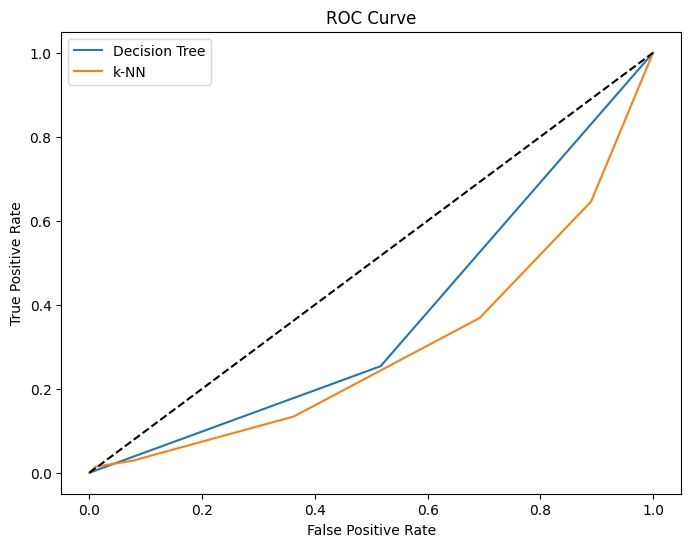

In [11]:
y_test_binary = y_test.replace({2: 0})  # Mengubah kelas target dari {1, 2} menjadi {0, 1}
fpr_dt, tpr_dt, _ = roc_curve(y_test_binary, y_pred_proba_dt)  # Menghitung False Positive Rate (fpr) dan True Positive Rate (tpr) untuk model Decision Tree
fpr_knn, tpr_knn, _ = roc_curve(y_test_binary, y_pred_proba_knn)  # Menghitung False Positive Rate (fpr) dan True Positive Rate (tpr) untuk model k-NN

# Membuat plot ROC curve
plt.figure(figsize=(8, 6))  # Mengatur ukuran plot
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')  # Plot ROC curve untuk model Decision Tree
plt.plot(fpr_knn, tpr_knn, label='k-NN')  # Plot ROC curve untuk model k-NN
plt.plot([0, 1], [0, 1], 'k--')  # Membuat garis diagonal (baseline) sebagai acuan model acak
plt.xlabel('False Positive Rate')  # Label sumbu X (tingkat false positive)
plt.ylabel('True Positive Rate')  # Label sumbu Y (tingkat true positive)
plt.title('ROC Curve')  # Judul plot
plt.legend(loc='best')  # Menambahkan legenda di lokasi terbaik
plt.show()  # Menampilkan plot

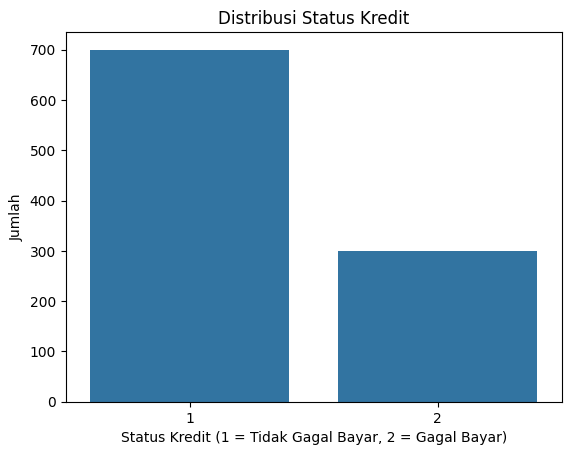

In [12]:
sns.countplot(x='Class', data=credit_data)  # Menampilkan jumlah observasi di setiap kategori dalam kolom 'Class'
plt.title('Distribusi Status Kredit')  # Menambahkan judul grafik yang menjelaskan konten visualisasi
plt.xlabel('Status Kredit (1 = Tidak Gagal Bayar, 2 = Gagal Bayar)')  # Menjelaskan bahwa sumbu X berisi status kredit
plt.ylabel('Jumlah')  # Menjelaskan bahwa sumbu Y menunjukkan jumlah observasi untuk setiap kategori kredit
plt.show()  # Menampilkan grafik di jendela output

## Regression model: Decision Tree  dan k-NN

In [14]:
# Pisahkan X (fitur) dan y (target)
# Misalkan y adalah 'x5' yang merupakan jumlah kredit
X = credit_data.drop(columns='x5')  # Semua fitur kecuali kolom target (misalnya x5)
y = credit_data['x5']  # Kolom target yang akan diprediksi (misalnya jumlah kredit)

# One-Hot Encoding untuk kolom kategorikal
X_encoded = pd.get_dummies(X)

# Split dataset menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Standardisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# 1. Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# 2. k-NN Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

# 3. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# 4. Basis Function Linear Regression (Polynomial Regression)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

lr_poly_model = LinearRegression()
lr_poly_model.fit(X_train_poly, y_train)
y_pred_lr_poly = lr_poly_model.predict(X_test_poly)

# Evaluation Metrics
def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = math.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mse, rmse, r2

# Evaluate Decision Tree
mse_dt, rmse_dt, r2_dt = evaluate_model(y_test, y_pred_dt)

# Evaluate k-NN
mse_knn, rmse_knn, r2_knn = evaluate_model(y_test, y_pred_knn)

# Evaluate Linear Regression
mse_lr, rmse_lr, r2_lr = evaluate_model(y_test, y_pred_lr)

# Evaluate Polynomial Regression
mse_lr_poly, rmse_lr_poly, r2_lr_poly = evaluate_model(y_test, y_pred_lr_poly)

# Display the results
results = pd.DataFrame({
    'Model': ['Decision Tree', 'k-NN', 'Linear Regression', 'Polynomial Regression'],
    'MSE': [mse_dt, mse_knn, mse_lr, mse_lr_poly],
    'RMSE': [rmse_dt, rmse_knn, rmse_lr, rmse_lr_poly],
    'R-Squared': [r2_dt, r2_knn, r2_lr, r2_lr_poly]
})

# Tampilkan hasil yang sudah dibulatkan
print(results)

                   Model           MSE          RMSE     R-Squared
0          Decision Tree  5.166876e+06  2.273076e+03  1.108501e-01
1                   k-NN  4.133408e+06  2.033079e+03  2.886960e-01
2      Linear Regression  2.933582e+06  1.712770e+03  4.951699e-01
3  Polynomial Regression  9.134224e+29  9.557313e+14 -1.571877e+23
